In [1]:
%%capture
%cd ..

In [2]:
%%capture
%pip install --upgrade pip
%pip install torchvision
%pip install scikit-learn
%pip install PyYAML
%pip install Pillow
%pip install torch
%pip install matplotlib
%pip install tensorflow
%pip install langdetect
%pip install wikipedia
%pip install tqdm
%pip install transformers
%pip install boto3
%pip install nltk

In [3]:
import sys

required_version = (3, 9)

if sys.version_info < required_version or sys.version_info >= (3, 10):
    sys_version = str(sys.version).split(" ")[0]
    raise Exception(f"This notebook requires Python 3.8, but the current version is {sys_version}.")
else:
    from src.utils.notebooks import *
    from src.processor.data_loader import get_data_loader, get_split_indices
    from src.utils.helpers import load_data
    import config.model_config as cfg

/Users/chenyongxin/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chenyongxin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on 

## GW, JH Datasets

In [4]:
data_loader_keys = cfg.trocr_charbert["experiment1"]["data_loader_keys"]
gw_data_loaders, iam_data_loaders, _ = get_data_loader(**data_loader_keys)

##### Dataset Information
- **text lines:** The total number of text lines in the dataset.
- **unique word instances:** The count of distinct words present in the dataset.
- **unique letters:** The number of different letters (characters) used across all text lines (include punctuations).
- **average text line length:** The average number of characters (letters and spaces) per text line.
- **average word length:** The average number of characters per word in the dataset.
- **None in ground truth:** The count of occurrences where the ground truth is the value "None."
- **percentage of non-character:** The percentage of characters in the dataset that are not part of the standard alphabet. This may include punctuation marks and other non-alphabetic characters. (characters other than A-Za-z0-9)

### GW Dataset

In [5]:
gw_image, gw_gt = get_dataset(GW_GT_PATH, GW_IMAGE_PATH)

In [7]:
check_text_lines(gw_image, gw_gt, "gw", gw_data_loaders)

Data            | Website         | Downloaded 
-----------------------------------------------
Text line       | 656             | 656            
Train           | 329             | 325            
Validation      | 163             | 168            
Test            | 164             | 163            
Assertion tests passed.


Metric                       | Value
----------------------------------------
text lines                   | 656
unique word instances        | 1456
unique letters               | 68
average text line length     | 40.23
average word length          | 6.17
None in ground truth         | 0
percentage of non-character  | 21.00




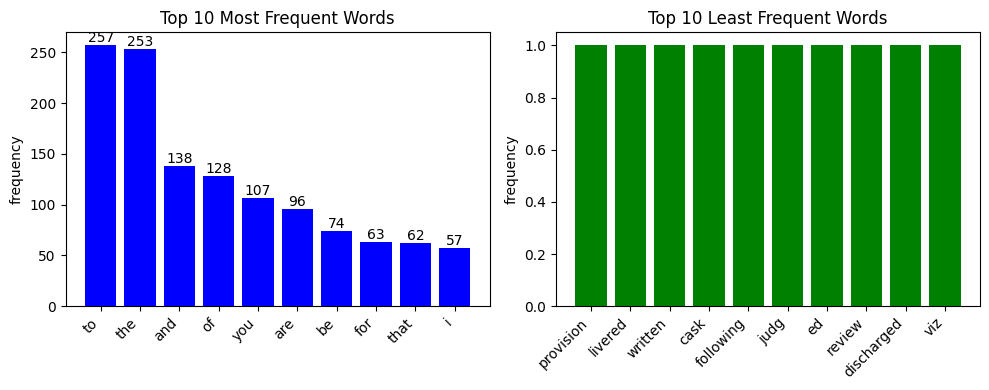

In [8]:
get_dataset_info(GW_GT_PATH, GW_IMAGE_PATH)

Image:


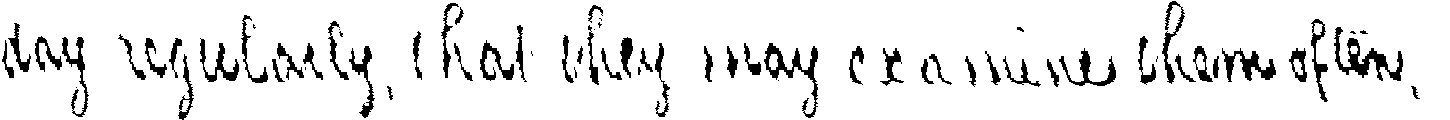

Ground Truth:
270. Letters, Orders and Instructions. October 1755.


In [9]:
visualise_dataset(GW_GT_PATH, GW_IMAGE_PATH)

In [10]:
get_punctuations()

'8th, sq, 2nd, 3rd, 5th, lb, 1th, 7th, 9th, et, cm, GW, mi, pt, qo, bl, br, qt, 0th, 6th, sl, 1st'

### IAM Dataset

In [6]:
iam_image, iam_gt = get_dataset(IAM_GT_PATH, IAM_IMAGE_PATH)

In [7]:
check_text_lines(iam_image, iam_gt, "iam", iam_data_loaders)

Data            | Website         | Downloaded 
-----------------------------------------------
Text line       | 13353           | 6916           
Train           | 6161            | 5532           
Validation      | 900             | 691            
Test            | 1861            | 693            
Assertion tests passed.


Metric                       | Value
----------------------------------------
text lines                   | 6916
unique word instances        | 8308
unique letters               | 84
average text line length     | 28.45
average word length          | 6.89
None in ground truth         | 0
percentage of non-character  | 22.40




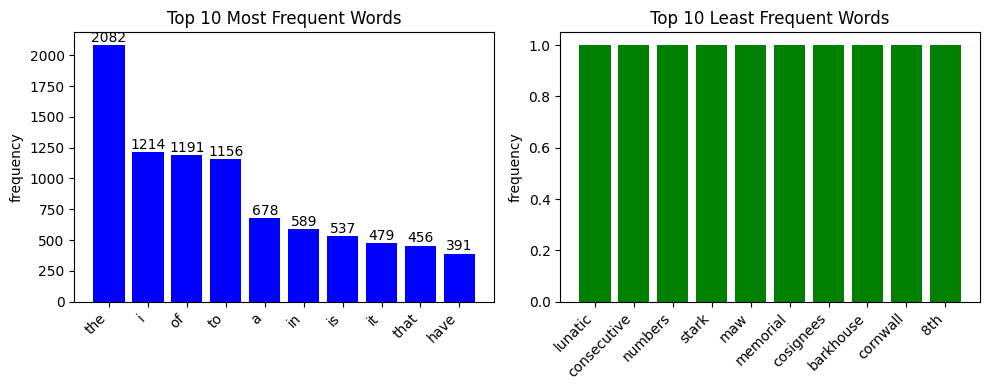

In [8]:
get_dataset_info(IAM_GT_PATH, IAM_IMAGE_PATH)

Image:


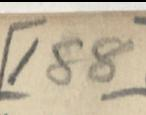

Ground Truth:
188


In [10]:
visualise_dataset(IAM_GT_PATH, IAM_IMAGE_PATH)

### Bullinger Dataset

In [ ]:
bullinger_image, bullinger_gt = get_dataset(BULLINGER_GT_PATH, BULLINGER_IMAGE_PATH)

In [ ]:
check_text_lines(bullinger_image, bullinger_gt, "bullinger", bullinger_data_loaders)

In [ ]:
get_dataset_info(BULLINGER_GT_PATH, BULLINGER_IMAGE_PATH)

In [ ]:
visualise_dataset(BULLINGER_GT_PATH, BULLINGER_IMAGE_PATH, "Bullinger")

### ICFHR 2016 Dataset

In [ ]:
icfhr_image, icfhr_gt = get_dataset(ICFHR_GT_PATH, ICFHR_IMAGE_PATH)

In [ ]:
get_dataset_info(ICFHR_GT_PATH, ICFHR_IMAGE_PATH)

In [ ]:
print("Images with gt==None: ")
for image, gt in zip(icfhr_image.items(), icfhr_gt.items()):
    if gt[1]==None:
        print(image[1])

In [ ]:
visualise_dataset(ICFHR_GT_PATH, ICFHR_IMAGE_PATH)

## Wikipedia Dataset

In [ ]:
from config.config_paths import DATA_PROCESSED, DATA_RAW
WIKI_TRAIN_PATH = os.path.join(".", "data", "wiki", "enwiki_train.txt")
WIKI_VAL_PATH = os.path.join(".", "data", "wiki", "enwiki_val.txt")

In [ ]:
get_wiki_lines()

In [ ]:
def wiki_dataset_info(path):
    with open(path, 'r') as file:
        lines = file.readlines()
        line_count = len(lines)
        formatted_line_count = "{:,}".format(line_count).replace(",", "'")
    print(lines[:5])
    # info = {"text lines": formatted_line_count,
    #         "unique word instances": len(all_words),
    #         "unique letters": len(set(all_gt)),
    #         "average text line length": get_average_len(list(gt_dict.values())),
    #         "average word length": get_average_len(list(all_words)),
    #         "None in ground truth": list(gt_dict.values()).count(None),
    #         "percentage of non-character": calculate_non_alphanumeric_percentage(all_gt)}

In [ ]:
wiki_dataset_info(WIKI_VAL_PATH)

In [ ]:
def get_dataset_info(gt_path, image_path):
    image_dict, gt_dict = get_dataset(gt_path, image_path)
    all_gt = " ".join([i for i in gt_dict.values() if i])
    all_words = set(all_gt.split(" "))
    word_frequencies = get_word_frequencies(all_gt)
    word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)
    # average_length = get_average_text_line_len(list(gt_dict.values()))
    info = {"text lines": len(gt_dict),
            "unique word instances": len(all_words),
            "unique letters": len(set(all_gt)),
            "average text line length": get_average_len(list(gt_dict.values())),
            "average word length": get_average_len(list(all_words)),
            "None in ground truth": list(gt_dict.values()).count(None),
            "percentage of non-character": calculate_non_alphanumeric_percentage(all_gt)}
    print("Metric                       | Value")
    print("----------------------------------------")
    for k,v in info.items():
        if type(v)==float:
            print(f"{k:<28} | {v:.2f}")
        else:
            print(f"{k:<28} | {v}")
    print("\n")

    plot_freq(word_frequencies[:10], word_frequencies[-10:], "Top 10 Least Frequent Words")
    return